In [1]:
# Install geopandas and any other missing packages: 
# E.g.
# pip install geopandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import geopandas as gpd
from matplotlib.colors import LogNorm

In [5]:
# Load the dataset

df = pd.read_excel("filtered_data.xlsx")

# General Analysis

In [7]:
# This function performs statistic tests

def stat(df, exclude=''):

    def stat_continents(df):
        records = []
        category_p_val = []
        
        df_2003_2012 = df[df['Year'] < 2013]
        df_2013_2023 = df[df['Year'] >= 2013]
        
        for continent in ['Africa', 'Asia', 'Europe', 'Oceania', 'South_America', 'North_America']:
            
            continent_2003_2012 = df_2003_2012[df_2003_2012['Locations_Continent'].str.contains(continent, na=False)].shape[0]
            continent_2013_2023 = df_2013_2023[df_2013_2023['Locations_Continent'].str.contains(continent, na=False)].shape[0]
        
            tot_trials_2003_2012 = df_2003_2012.shape[0]
            tot_trials_2013_2023 = df_2013_2023.shape[0]
        
            contingency_table = np.array([
                [continent_2003_2012, tot_trials_2003_2012 - continent_2003_2012],
                [continent_2013_2023, tot_trials_2013_2023 - continent_2013_2023]
            ])
            if np.any(contingency_table < 5):
                odds_ratio, p = stats.fisher_exact(contingency_table)
                test = 'Fisher'
            else:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                test = 'Chi2'
         
            if p < 0.01:
                p ='< 0.01'
            else:
                p = f'{round(p,2)}'
                
            records.append({
                'Countinent': continent,
                '2003-2012': f'{continent_2003_2012} ({round((continent_2003_2012/tot_trials_2003_2012)*100,2)}%)',
                '2013-2023': f'{continent_2013_2023} ({round((continent_2013_2023/tot_trials_2013_2023)*100,2)}%)',
                'P-Value': p,
                'Test': test 
            })
            category_p_val.append([continent_2003_2012, continent_2013_2023])
        
        p_values_df = pd.DataFrame(records)
        
        p_values_df['P-Value'] = p_values_df['P-Value']
        
        chi2_stat, p_value, dof, expected = chi2_contingency(category_p_val)
        if p_value < 0.01:
                p_value ='< 0.01'
        else:
            p_value = f'{round(p_value,2)}'
        print(f"\nContinents: P-value: {p_value}\n")
        
        print(p_values_df)

    stat_continents(df)
    
    records = []
    category_p_val = []
    
    df_2003_2012 = df[df['Year'] < 2013]
    df_2013_2023 = df[df['Year'] >= 2013]
    exclude_list = ['Study Title', 'Locations_Country', 'Year', 'Locations_Continent']
    if exclude != '':
        exclude_list.append(exclude)
    for col in df.columns:
        if col not in exclude_list:
            category_p_val = []
            conditions = df[col].unique()
    
            trials_2003_2012 = {}
            trials_2013_2023 = {}
            tot_trials_2003_2012 = df_2003_2012.shape[0]
            tot_trials_2013_2023 = df_2013_2023.shape[0]
    
            for condition in conditions:
                trials_2003_2012[condition] = df_2003_2012[df_2003_2012[col] == condition].shape[0]
                trials_2013_2023[condition] = df_2013_2023[df_2013_2023[col] == condition].shape[0]
                contingency_table = np.array([
                    [trials_2003_2012[condition], tot_trials_2003_2012 - trials_2003_2012[condition]],
                    [trials_2013_2023[condition], tot_trials_2013_2023 - trials_2013_2023[condition]]
                ])
                if np.any(contingency_table < 5):
                    odds_ratio, p = stats.fisher_exact(contingency_table)
                    test = 'Fisher'
                else:
                    chi2, p, dof, expected = chi2_contingency(contingency_table)
                    test = 'Chi2'
                if p < 0.01:
                    p ='< 0.01'
                else:
                    p = f'{round(p,2)}'
                    
                records.append({
                    'Parameter': col,
                    'Condition': condition,
                    '2003-2012': f'{trials_2003_2012[condition]} ({round((trials_2003_2012[condition]/tot_trials_2003_2012)*100,2)}%)',
                    '2013-2023': f'{trials_2013_2023[condition]} ({round((trials_2013_2023[condition]/tot_trials_2013_2023)*100,2)}%)',
                    'P-Value': p,
                    'Test': test 
                })
                category_p_val.append([trials_2003_2012[condition], trials_2013_2023[condition]])
            chi2_stat, p_value, dof, expected = chi2_contingency(category_p_val)
            if p_value < 0.01:
                    p_value ='< 0.01'
            else:
                p_value = f'{round(p_value,2)}'
            print(f"\n{col} Group: P-value: {p_value}\n")
            records_df = pd.DataFrame(records)
            print(records_df[records_df['Parameter']==col][['Condition', '2003-2012', '2013-2023', 'P-Value', 'Test']])

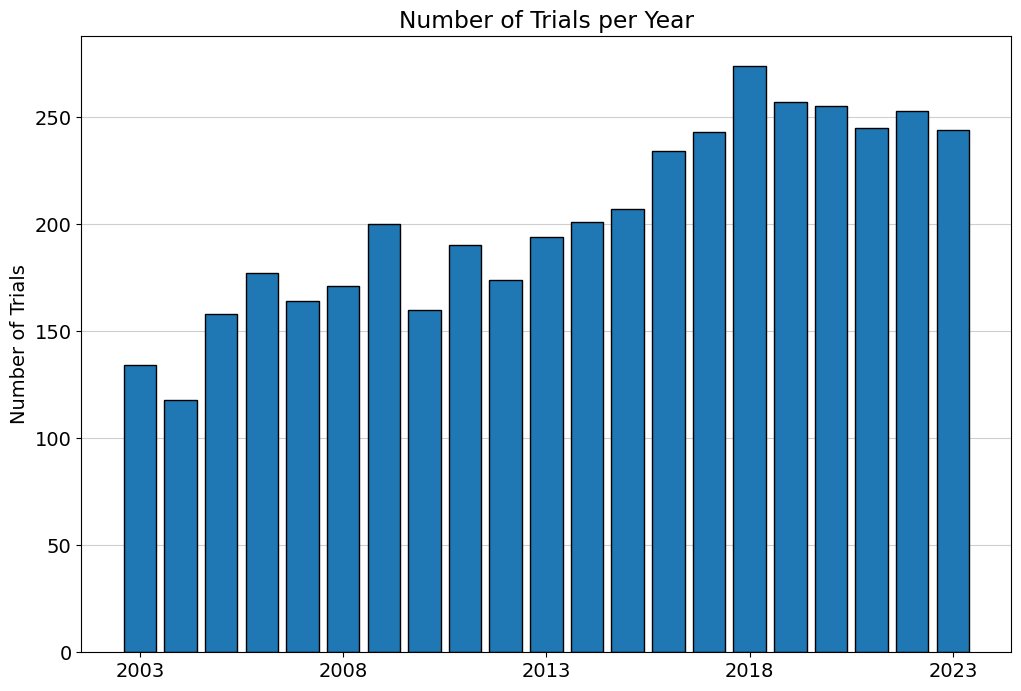

In [8]:
# Plot number of trials per year

year_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

plt.bar(year_counts.index, year_counts.values, alpha=1, width=0.8, edgecolor='black', zorder=3)
plt.ylabel('Number of Trials')
plt.title('Number of Trials per Year') 
plt.grid(alpha=0.6, zorder=0, axis='y')

ax = plt.gca()
ax.spines['bottom'].set_zorder(10)
ax.spines['top'].set_zorder(10)
ax.spines['right'].set_zorder(10)
ax.spines['left'].set_zorder(10)

plt.xticks([2003, 2008, 2013, 2018, 2023]) 
plt.savefig('plots/Fig_2.pdf')
plt.show()

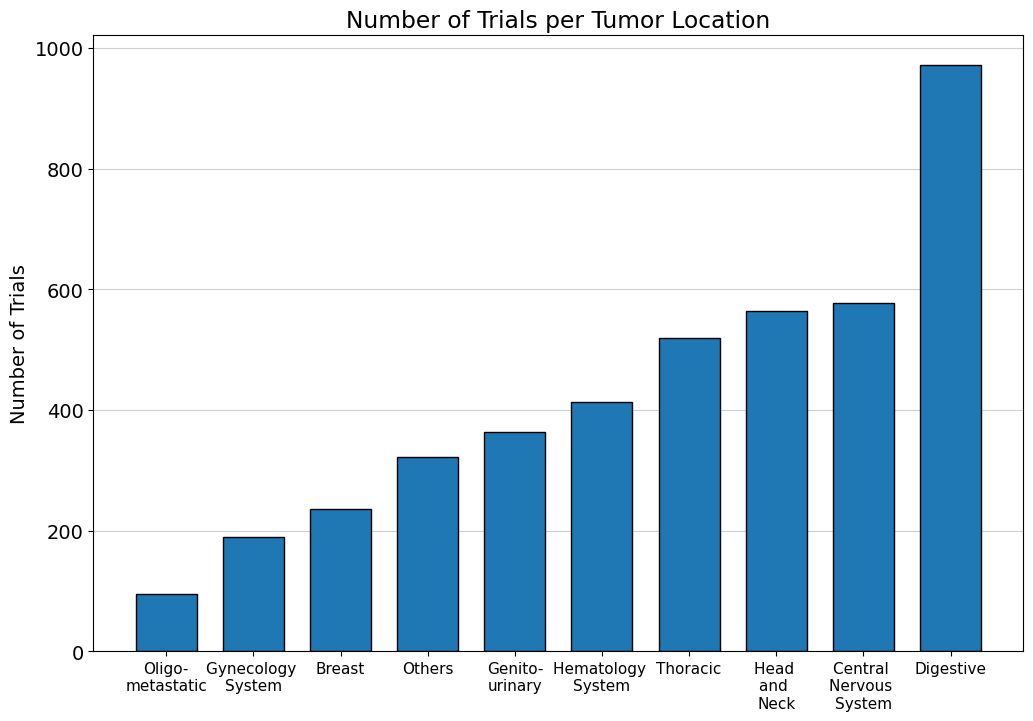

In [9]:
# Number of Trials per Tumor Location

condition_counts = df['Conditions'].value_counts().sort_values()

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

plt.bar(condition_counts.index, condition_counts.values, width=0.7, edgecolor='black', zorder= 3)
plt.ylabel('Number of Trials')

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=['Oligo-\nmetastatic', 'Gynecology \nSystem', 'Breast', 'Others', 
                                                'Genito-\nurinary', 'Hematology \nSystem', 'Thoracic', 
                                                'Head \nand \nNeck', 'Central \nNervous \nSystem', 'Digestive'], 
           rotation=0, fontdict={'fontsize': 11}) 

plt.grid(alpha=0.6, zorder=0, axis='y')

ax = plt.gca() 
ax.spines['bottom'].set_zorder(10)
ax.spines['top'].set_zorder(10)
ax.spines['right'].set_zorder(10)
ax.spines['left'].set_zorder(10)

plt.title('Number of Trials per Tumor Location')
plt.savefig('plots/Fig_3.pdf', bbox_inches='tight')
plt.show()

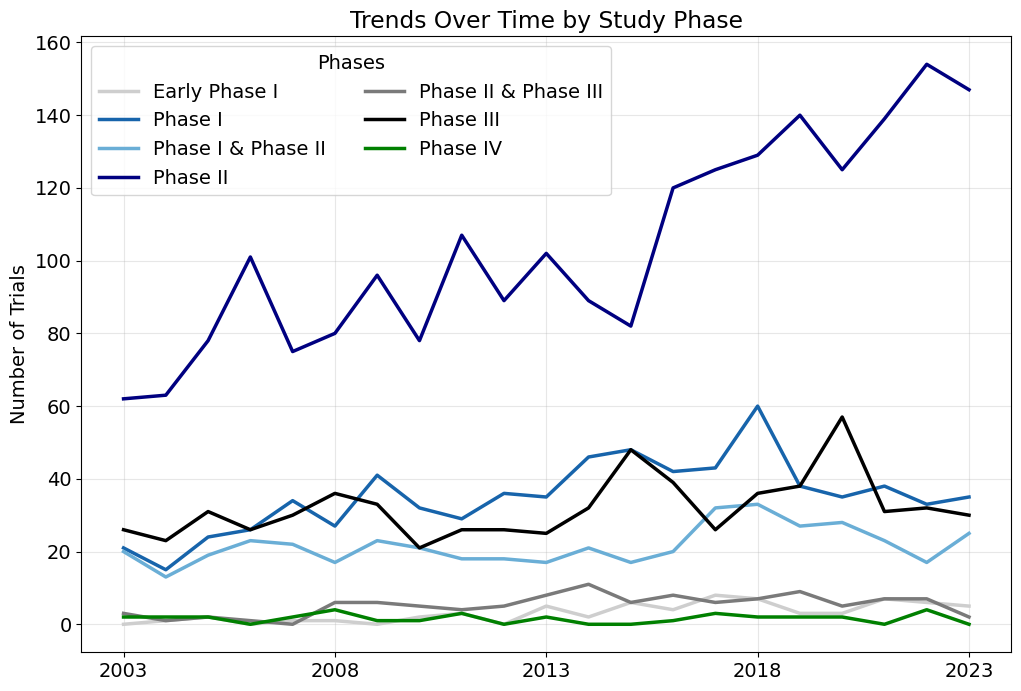

In [10]:
# Trends Over Time by Study Phase

grouped_data = df.groupby(['Year', 'Phases']).size().unstack(fill_value=0)
colors={'Early Phase I': '#cecece',
        'Phase I': '#1764ab',
        'Phase I & Phase II': '#6aaed6',
        'Phase II': 'navy',
        'Phase II & Phase III': '#7a7a7a',
        'Phase III': 'black',
        'Phase IV': 'g'}

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

for phase in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[phase], label=phase, color=colors[phase],  linewidth=2.5)

plt.title('Trends Over Time by Study Phase')
plt.ylabel('Number of Trials')
plt.legend(title='Phases', ncol=2)
plt.xticks([2003, 2008, 2013, 2018, 2023])
plt.grid(alpha=.3)
plt.savefig('plots/Fig_4.pdf')
plt.show()

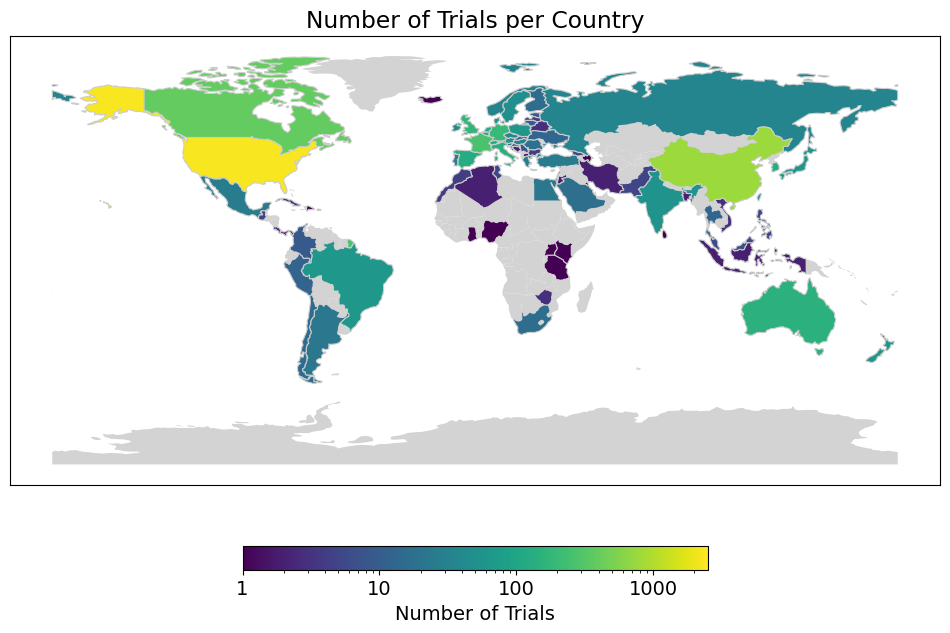

In [13]:
# Geoplot

def map(data):
    world = gpd.read_file("map/ne_110m_admin_0_countries.shp")
    
    countries = []
    for index, _ in data.iterrows():
        countries = countries + [country.strip() for country in data['Locations_Country'][index].split(',')]
    for index in range(len(countries)):
        if countries[index] == 'Korea': 
            countries[index] = 'South Korea'
        if countries[index] == 'United States':
            countries[index] = 'United States of America'
        if countries[index] == 'Russian Federation':
            countries[index] = 'Russia'
        if countries[index] == 'Macedonia':    
            countries[index] = 'North Macedonia'
        if countries[index] == 'Czech Republic':
            countries[index] = 'Czechia'
        if countries[index] == 'Tanzania':
            countries[index] = 'United Republic of Tanzania'
        if countries[index] == 'Serbia':
            countries[index] = 'Republic of Serbia'

    word_list = world['ADMIN'].tolist()
    no_trials = []
    for country in word_list:
        if country not in countries:
            no_trials.append(country)

    country_counts = {}
    for country in countries:
        country_counts[country] = country_counts.get(country, 0) + 1

    for country in no_trials:
        country_counts[country] = 0

    world['data_points_count'] = world['ADMIN'].map(country_counts)

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.rcParams.update({'font.size': 14})
    norm = LogNorm(vmin=1, vmax=2500)
    
    world[world.data_points_count > 0].plot(column='data_points_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm)
    world[world.data_points_count == 0].plot(color='lightgray', ax=ax)

    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)

    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1)
    cbar.set_label('Number of Trials')
    
    tick_values = [1, 10, 100, 1000]
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels(['1', '10', '100', '1000'])

    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.title('Number of Trials per Country')
    plt.savefig('plots/Fig_5a.pdf')
    plt.show()
    
map(df)

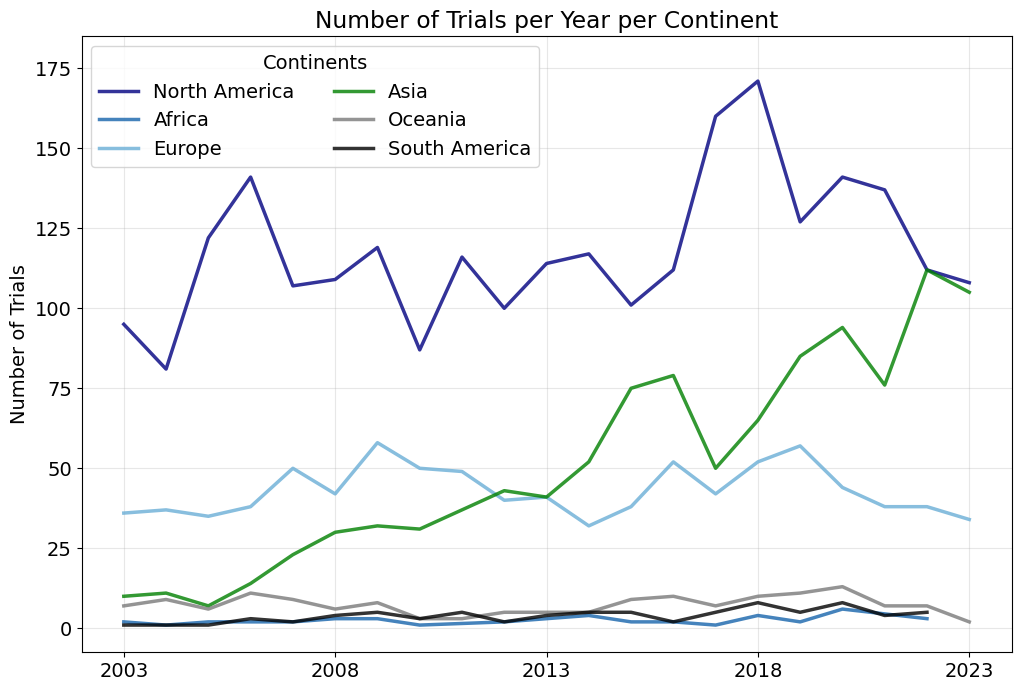

In [14]:
# Number of Trials per Year per Continent

africa_rows = df[df['Locations_Continent'].str.contains('Africa', na=False)]
asia_rows = df[df['Locations_Continent'].str.contains('Asia', na=False)]
europe_rows = df[df['Locations_Continent'].str.contains('Europe', na=False)]
oceania_rows = df[df['Locations_Continent'].str.contains('Oceania', na=False)]
south_america_rows = df[df['Locations_Continent'].str.contains('South_America', na=False)]
north_america_rows = df[df['Locations_Continent'].str.contains('North_America', na=False)]

year_counts_africa = africa_rows['Year'].value_counts().sort_index()
year_counts_north_america = north_america_rows['Year'].value_counts().sort_index()
year_counts_europe = europe_rows['Year'].value_counts().sort_index()
year_counts_asia = asia_rows['Year'].value_counts().sort_index()
year_counts_oceania = oceania_rows['Year'].value_counts().sort_index()
year_counts_south_america = south_america_rows['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

plt.plot(year_counts_north_america.index, year_counts_north_america.values, label = 'North America', alpha = .8, color='navy', linewidth=2.5)
plt.plot(year_counts_africa.index, year_counts_africa.values, label = 'Africa', alpha = .8, color='#1764ab', linewidth=2.5)
plt.plot(year_counts_europe.index, year_counts_europe.values, label = 'Europe', alpha = .8, color='#6aaed6', linewidth=2.5)
plt.plot(year_counts_asia.index, year_counts_asia.values, label = 'Asia', alpha = .8, linewidth=2.5, color= 'g')
plt.plot(year_counts_oceania.index, year_counts_oceania.values, label = 'Oceania', alpha = .8, color='#7a7a7a', linewidth=2.5)
plt.plot(year_counts_south_america.index, year_counts_south_america.values, label = 'South America', alpha = .8, color='black', linewidth=2.5)

plt.ylabel('Number of Trials', fontsize=14)
plt.title('Number of Trials per Year per Continent')
plt.xticks([2003, 2008, 2013, 2018, 2023])
plt.yticks([year for year in range(0, 199, 25)])
plt.ylim(top=185)
plt.legend(title='Continents', ncol=2)
plt.grid(alpha=.3)
plt.savefig('plots/Fig_5b.pdf')
plt.show()

# Statistic

In [19]:
# This function performs statistic tests

def stat(df, exclude=''):

    def stat_continents(df):
        records = []
        category_p_val = []
        
        df_2003_2012 = df[df['Year'] < 2013]
        df_2013_2023 = df[df['Year'] >= 2013]
        
        for continent in ['Africa', 'Asia', 'Europe', 'Oceania', 'South_America', 'North_America']:
            
            continent_2003_2012 = df_2003_2012[df_2003_2012['Locations_Continent'].str.contains(continent, na=False)].shape[0]
            continent_2013_2023 = df_2013_2023[df_2013_2023['Locations_Continent'].str.contains(continent, na=False)].shape[0]
        
            tot_trials_2003_2012 = df_2003_2012.shape[0]
            tot_trials_2013_2023 = df_2013_2023.shape[0]
        
            contingency_table = np.array([
                [continent_2003_2012, tot_trials_2003_2012 - continent_2003_2012],
                [continent_2013_2023, tot_trials_2013_2023 - continent_2013_2023]
            ])
            if np.any(contingency_table < 5):
                odds_ratio, p = stats.fisher_exact(contingency_table)
                test = 'Fisher'
            else:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                test = 'Chi2'
         
            if p < 0.01:
                p ='< 0.01'
            else:
                p = f'{round(p,2)}'
                
            records.append({
                'Countinent': continent,
                '2003-2012': f'{continent_2003_2012} ({round((continent_2003_2012/tot_trials_2003_2012)*100,2)}%)',
                '2013-2023': f'{continent_2013_2023} ({round((continent_2013_2023/tot_trials_2013_2023)*100,2)}%)',
                'P-Value': p,
                'Test': test 
            })
            category_p_val.append([continent_2003_2012, continent_2013_2023])
        
        p_values_df = pd.DataFrame(records)
        
        p_values_df['P-Value'] = p_values_df['P-Value']
        
        chi2_stat, p_value, dof, expected = chi2_contingency(category_p_val)
        if p_value < 0.01:
                p_value ='< 0.01'
        else:
            p_value = f'{round(p_value,2)}'
        print(f"\nContinents: P-value: {p_value}\n")
        
        print(p_values_df)

    stat_continents(df)
    
    records = []
    category_p_val = []
    
    df_2003_2012 = df[df['Year'] < 2013]
    df_2013_2023 = df[df['Year'] >= 2013]
    exclude_list = ['Study Title', 'Locations_Country', 'Year', 'Locations_Continent']
    if exclude != '':
        exclude_list.append(exclude)
    for col in df.columns:
        if col not in exclude_list:
            category_p_val = []
            conditions = df[col].unique()
    
            trials_2003_2012 = {}
            trials_2013_2023 = {}
            tot_trials_2003_2012 = df_2003_2012.shape[0]
            tot_trials_2013_2023 = df_2013_2023.shape[0]
    
            for condition in conditions:
                trials_2003_2012[condition] = df_2003_2012[df_2003_2012[col] == condition].shape[0]
                trials_2013_2023[condition] = df_2013_2023[df_2013_2023[col] == condition].shape[0]
                contingency_table = np.array([
                    [trials_2003_2012[condition], tot_trials_2003_2012 - trials_2003_2012[condition]],
                    [trials_2013_2023[condition], tot_trials_2013_2023 - trials_2013_2023[condition]]
                ])
                if np.any(contingency_table < 5):
                    odds_ratio, p = stats.fisher_exact(contingency_table)
                    test = 'Fisher'
                else:
                    chi2, p, dof, expected = chi2_contingency(contingency_table)
                    test = 'Chi2'
                if p < 0.01:
                    p ='< 0.01'
                else:
                    p = f'{round(p,2)}'
                    
                records.append({
                    'Parameter': col,
                    'Condition': condition,
                    '2003-2012': f'{trials_2003_2012[condition]} ({round((trials_2003_2012[condition]/tot_trials_2003_2012)*100,2)}%)',
                    '2013-2023': f'{trials_2013_2023[condition]} ({round((trials_2013_2023[condition]/tot_trials_2013_2023)*100,2)}%)',
                    'P-Value': p,
                    'Test': test 
                })
                category_p_val.append([trials_2003_2012[condition], trials_2013_2023[condition]])
            chi2_stat, p_value, dof, expected = chi2_contingency(category_p_val)
            if p_value < 0.01:
                    p_value ='< 0.01'
            else:
                p_value = f'{round(p_value,2)}'
            print(f"\n{col} Group: P-value: {p_value}\n")
            records_df = pd.DataFrame(records)
            print(records_df[records_df['Parameter']==col][['Condition', '2003-2012', '2013-2023', 'P-Value', 'Test']])

stat(df)


Continents: P-value: < 0.01

      Countinent      2003-2012     2013-2023 P-Value  Test
0         Africa     16 (0.97%)    24 (0.92%)     1.0  Chi2
1           Asia   238 (14.46%)  834 (31.99%)  < 0.01  Chi2
2         Europe   435 (26.43%)  468 (17.95%)  < 0.01  Chi2
3        Oceania     67 (4.07%)     86 (3.3%)    0.22  Chi2
4  South_America     27 (1.64%)    51 (1.96%)    0.53  Chi2
5  North_America  1077 (65.43%)  1400 (53.7%)  < 0.01  Chi2

Study Status Group: P-value: < 0.01

       Condition     2003-2012      2013-2023 P-Value  Test
0        Ongoing   129 (7.84%)  1536 (58.92%)  < 0.01  Chi2
1        Unknown  229 (13.91%)   366 (14.04%)    0.94  Chi2
2      Completed  926 (56.26%)   430 (16.49%)  < 0.01  Chi2
3  Stopped Early  362 (21.99%)   275 (10.55%)  < 0.01  Chi2

Conditions Group: P-value: < 0.01

                 Condition     2003-2012     2013-2023 P-Value    Test
4                Digestive  351 (21.32%)  621 (23.82%)    0.06    Chi2
5                   Others   106 (

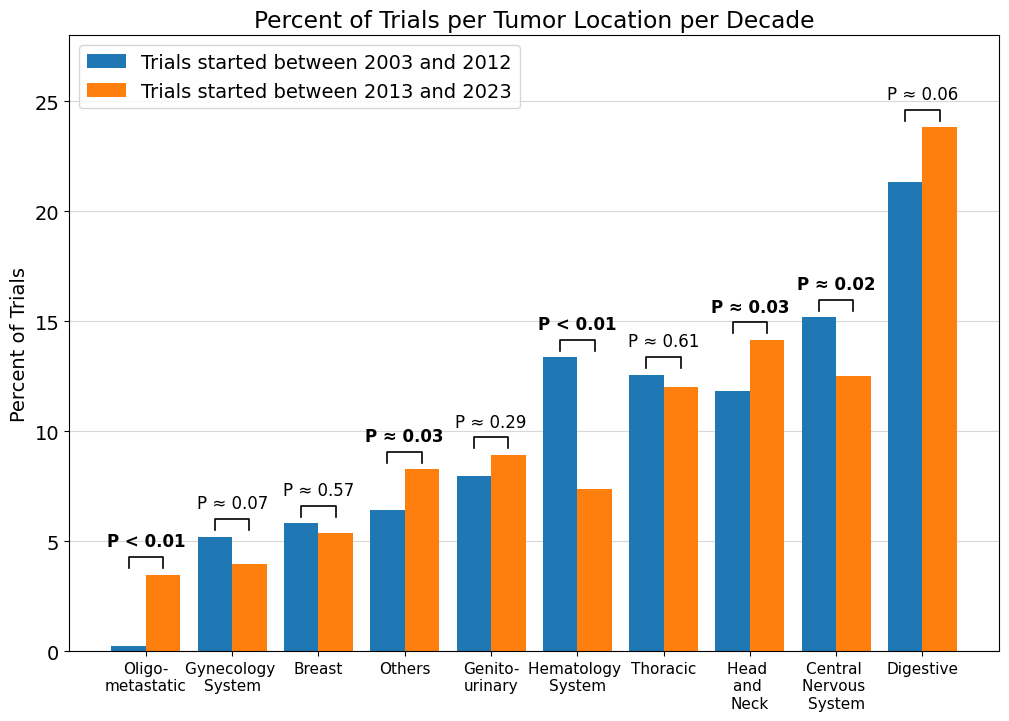

In [23]:
df_2003_2012 = df[df['Year'] < 2013]
df_2013_2023 = df[df['Year'] >= 2013]
# Percent of Trials per Tumor Location per Decade

condition_counts_2003_2012 = df_2003_2012['Conditions'].value_counts().sort_index()
condition_counts_2013_2023 = df_2013_2023['Conditions'].value_counts().sort_index()

combined_counts = (condition_counts_2003_2012 + condition_counts_2013_2023).sort_values(ascending=True)

conditions = combined_counts.index
bar_width = 0.4
x = np.arange(len(conditions))

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

p_list = ['P < 0.01', 'P \u2248 0.07', 'P \u2248 0.57', 'P \u2248 0.03', 'P \u2248 0.29', 'P < 0.01', 'P \u2248 0.61', 'P \u2248 0.03', 'P \u2248 0.02', 'P \u2248 0.06']

plt.bar(x - bar_width/2, [condition_counts_2003_2012.get(condition, 0)*(100/np.sum(condition_counts_2003_2012)) for condition in conditions], width=bar_width, label='Trials started between 2003 and 2012', alpha=1, zorder=3)
plt.bar(x + bar_width/2, [condition_counts_2013_2023.get(condition, 0)*(100/np.sum(condition_counts_2013_2023)) for condition in conditions], width=bar_width, label='Trials started between 2013 and 2023', alpha=1, zorder=3)
for i in x:
    max_y = max(condition_counts_2013_2023.get(conditions[i])*(100/2607),  condition_counts_2003_2012.get(conditions[i])*(100/1646)) + 0.8
    plt.plot([x[i]-.2, x[i]-.2, x[i]+.2, x[i]+.2], [max_y-0.5, max_y, max_y, max_y-0.5], lw=1.2, c='k')
    if float(p_list[i].split(' ')[-1]) <= 0.05: 
        plt.text(x[i], max_y+0.3, p_list[i], ha='center', va='bottom', color='k', fontweight='bold', fontsize=12)
    else:
        plt.text(x[i], max_y+0.3, p_list[i], ha='center', va='bottom', color='k', fontsize=12)

plt.ylabel('Percent of Trials', fontsize=14)

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=['Oligo-\nmetastatic', 'Gynecology \nSystem', 'Breast', 'Others', 
                                                'Genito-\nurinary', 'Hematology \nSystem', 'Thoracic', 
                                                'Head \nand \nNeck', 'Central \nNervous \nSystem', 'Digestive'], 
           rotation=0, fontdict={'fontsize': 11})

plt.title('Percent of Trials per Tumor Location per Decade')
plt.ylim(top=28)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.5, zorder=1)

ax = plt.gca()
ax.spines['bottom'].set_zorder(10)
ax.spines['top'].set_zorder(10)
ax.spines['right'].set_zorder(10)
ax.spines['left'].set_zorder(10)

plt.savefig('plots/fig_appendix_1.pdf', bbox_inches='tight')
plt.show()


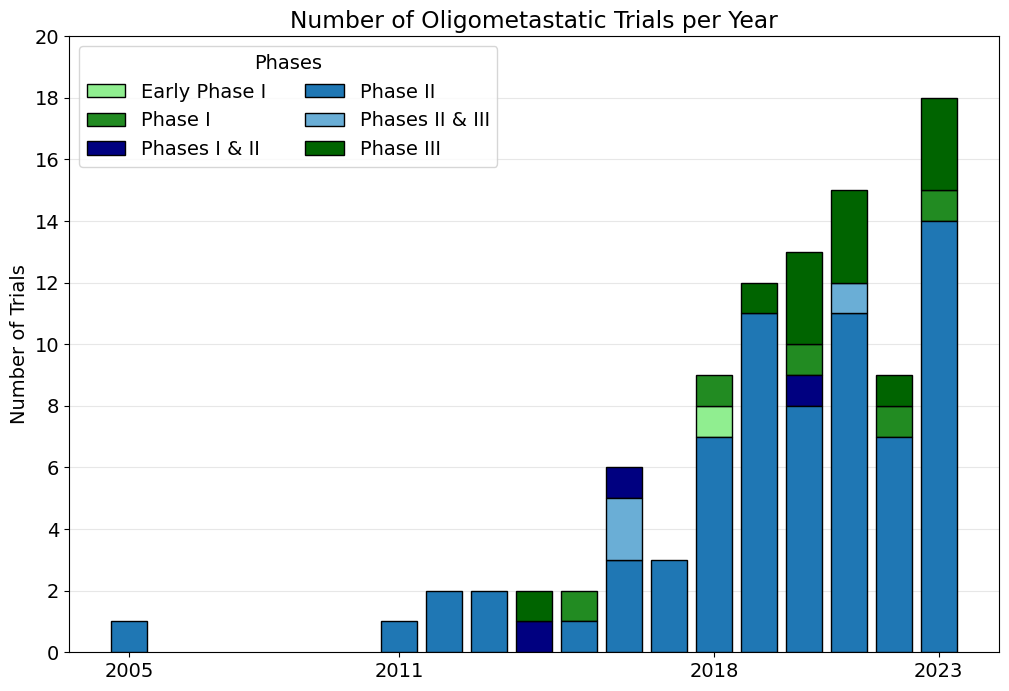

In [24]:
# Number of Oligometastatic Trials per Year

omd_df = df[df['Conditions'] == 'Oligometastatic']

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

for year in range(2003, 2024):
    if len(omd_df[omd_df['Year']==year]['Phases'].unique()) != 0:
        early_ph_I = 0
        ph_I = 0
        ph_I_II = 0
        ph_II = 0
        ph_II_III = 0
        ph_III = 0
        ph_IV = 0
        for phase in omd_df[omd_df['Year']==year]['Phases']:
            if phase == 'Early Phase I':
                early_ph_I += 1
            elif phase == 'Phase I':
                ph_I += 1
            elif phase == 'Phase I & Phase II':
                ph_I_II += 1
            elif phase == 'Phase II':
                ph_II += 1
            elif phase == 'Phase II & Phase III':
                ph_II_III += 1
            elif phase == 'Phase III':
                ph_III += 1
            elif phase == 'Phase IV':
                ph_IV += 1
        if early_ph_I !=0:
            plt.bar(year, early_ph_I, bottom=ph_II+ph_II_III+ph_I_II, color='lightgreen', edgecolor='black', zorder=3)
        if ph_I !=0:
            plt.bar(year, ph_I, bottom=ph_II+ph_II_III+ph_I_II+early_ph_I, color='forestgreen', edgecolor='black', zorder=3)
        if ph_I_II !=0:
            plt.bar(year, ph_I_II, bottom=ph_II+ph_II_III, color='navy', edgecolor='black', zorder=3)
        if ph_II !=0:
            plt.bar(year, ph_II, color='#1f77b4', edgecolor='black', zorder=3)
        if ph_II_III != 0:
            plt.bar(year, ph_II_III, bottom=ph_II, color='#6aaed6', edgecolor='black', zorder=3)
        if ph_III != 0:
            plt.bar(year, ph_III,bottom=ph_II+ph_II_III+ph_I_II+early_ph_I+ph_I, color='darkgreen', edgecolor='black', zorder=3)
        
plt.bar(2005, 0, color='lightgreen', zorder=1, edgecolor='black',  label='Early Phase I')
plt.bar(2005, 0, color='forestgreen', zorder=1, edgecolor='black', label='Phase I')
plt.bar(2005, 0, color='navy', zorder=1, edgecolor='black', label='Phases I & II')
plt.bar(2005, 0, color='#1f77b4', edgecolor='black', zorder=1, label='Phase II')
plt.bar(2005, 0, color='#6aaed6', edgecolor='black', zorder=1, label='Phases II & III')
plt.bar(2005, 0, color='darkgreen', edgecolor='black', zorder=1, label='Phase III')

plt.ylabel('Number of Trials')
plt.title('Number of Oligometastatic Trials per Year')
plt.grid(alpha = .3, axis = 'y')
plt.xticks([2005, 2011, 2018, 2023])
plt.legend(title='Phases', ncol=2)
plt.yticks(range(0, 21, 2))
plt.savefig('plots/fig_appendix_2a.pdf')
plt.show()


In [25]:
omd_df = df[df['Conditions'] == 'Oligometastatic']

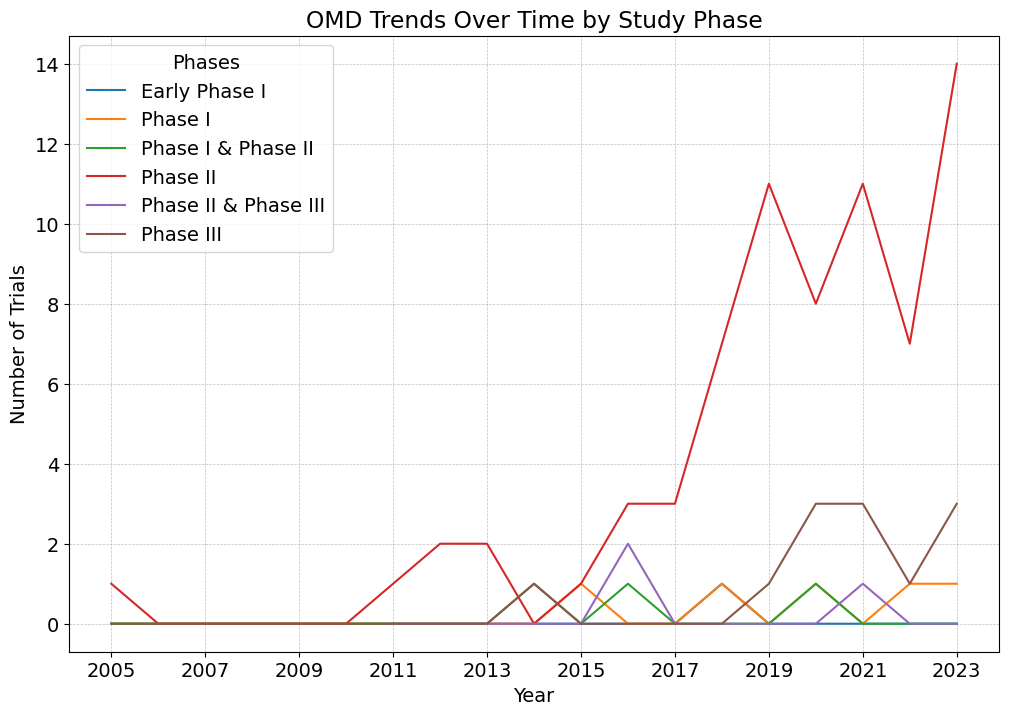

In [26]:
# Group by year and phase, then count the number of occurrences

omd_df = df[df['Conditions'] == 'Oligometastatic']
grouped_data = omd_df.groupby(['Year', 'Phases'], observed = False).size().unstack(fill_value=0)
empty_row = {
    'Early Phase I': 0,
    'Phase I': 0,
    'Phase I & Phase II': 0,
    'Phase II': 0,
    'Phase II and Phase III': 0,
    'Phase III': 0,
    'Phase IV': 0
}

# Add new row to the DataFrame
grouped_data.loc[2006] = empty_row
grouped_data.loc[2010] = empty_row

grouped_data = grouped_data.sort_index()

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

for phase in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[phase], label=phase)

plt.title('OMD Trends Over Time by Study Phase')
plt.xlabel('Year')
plt.ylabel('Number of Trials')
plt.legend(title='Phases')
plt.xticks([i for i in range(2005, 2024,2)])
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
#plt.tight_layout()
plt.savefig('plots/fig_appendix_2b.pdf')
plt.show()